In [1]:
from os.path import expanduser, join
from pathlib import Path
import sys

from cycler import cycler
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import xarray as xr

user_home_dir = expanduser('~')
sys.path.insert(0, join(user_home_dir, "emu-utilities"))
from emu_utilities import tracer, resample

import matplotlib.animation as animation

In [2]:
NOTEBOOK_DIR = Path().resolve()
FIGURES_DIR = Path(NOTEBOOK_DIR / "../../figures").resolve()
DATA_DIR_S = Path("/efs_ecco/sjarugul/Project_Datasets")
TRCR_10_PATH = DATA_DIR_S / "emu_trc_6787_6210_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0"

In [3]:
trcr_10_ds = tracer.load_tracer_gradient(TRCR_10_PATH)

In [8]:
trcr_10_ds.where((trcr_10_ds.xc > 105) & (trcr_10_ds.xc < 115) & (trcr_10_ds.yc > -12) & (trcr_10_ds.yc < -8), drop=True).sel(tile=4)

<xarray.Dataset> Size: 168kB
Dimensions:                  (time: 20, k: 50, j: 4, i: 10)
Coordinates:
  * time                     (time) datetime64[ns] 160B 2008-12-31T12:00:00 ....
  * k                        (k) int64 400B 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
    tile                     int64 8B 4
  * j                        (j) int64 32B 58 59 60 61
  * i                        (i) int64 80B 53 54 55 56 57 58 59 60 61 62
    xc                       (j, i) float64 320B 105.5 106.5 ... 113.5 114.5
    yc                       (j, i) float64 320B -11.44 -11.44 ... -8.516 -8.516
    xg                       (j, i) float64 320B 105.0 106.0 ... 113.0 114.0
    yg                       (j, i) float64 320B -11.93 -11.93 ... -8.998 -8.998
Data variables:
    tracer                   (time, k, j, i) float32 160kB 5.336e-06 ... nan
    tracer_depth_integrated  (time, j, i) float64 6kB 4.196e-05 ... nan
Attributes:
    created:   2025-05-29T02:40:08.046369
    run_name:  emu_trc_6787_6210_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0
    tool:      trc

In [4]:
trcr_10_ds = resample.resample_ds(
    trcr_10_ds,
    -90,
    90,
    1,
    -180, 
    180, 
    1,
    mapping_method="nearest_neighbor"
)

In [8]:
trcr_10_ds

<xarray.Dataset> Size: 270MB
Dimensions:                  (time: 20, k: 50, lat: 180, lon: 360)
Coordinates:
  * time                     (time) datetime64[ns] 160B 2008-12-31T12:00:00 ....
  * k                        (k) int64 400B 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * lat                      (lat) float64 1kB -89.5 -88.5 -87.5 ... 88.5 89.5
  * lon                      (lon) float64 3kB -179.5 -178.5 ... 178.5 179.5
Data variables:
    tracer                   (time, k, lat, lon) float32 259MB nan nan ... nan
    tracer_depth_integrated  (time, lat, lon) float64 10MB nan nan ... 0.0 0.0
Attributes:
    created:   2025-05-28T22:42:35.291487
    run_name:  emu_trc_6787_6210_trc3d.105.0_115.0_-12.0_-8.0_10.0_0.0
    tool:      trc

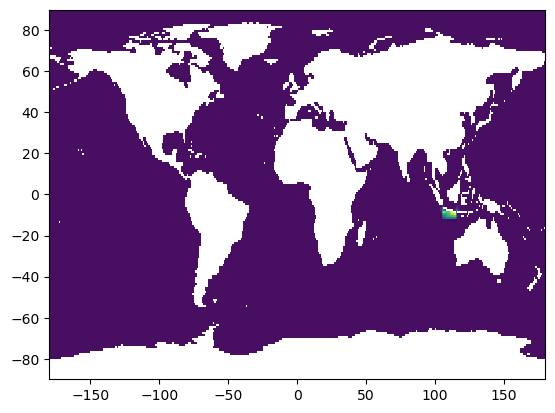

In [23]:
plt.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"], trcr_10_ds["tracer"].isel(time=-1, k=0).values)

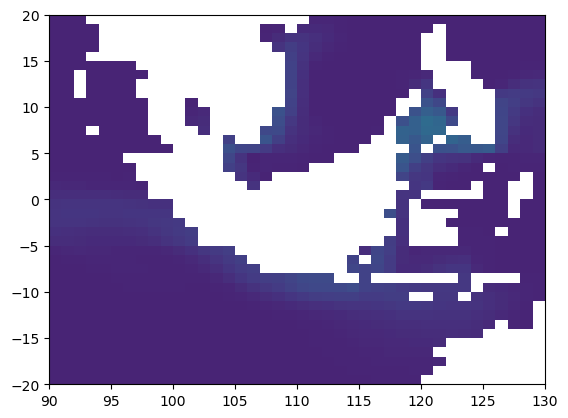

In [59]:


fig, ax = plt.subplots()
pcm = ax.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"], trcr_10_ds["tracer"].isel(k=5).isel(time=-1).values)
i = len(trcr_10_ds["time"] - 2)
ax.set_xlim(90, 130)
ax.set_ylim(-20, 20)
# plt.colorbar()

def update(frame):
    pcm.set_array(trcr_10_ds["tracer"].isel(k=5).isel(time=(len(trcr_10_ds["time"])) - frame - 1).values.flatten())
    return pcm,
    
ani = animation.FuncAnimation(fig, update, frames=10, interval=200, blit=True)
ani.save('pcolormesh_animation.gif', writer='pillow')

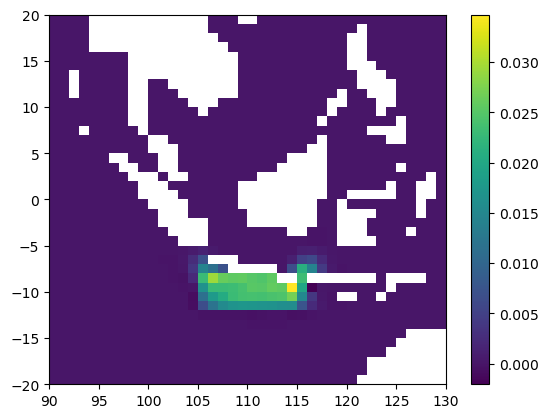

In [56]:
fig, ax = plt.subplots()
pcm = ax.pcolormesh(trcr_10_ds["lon"], trcr_10_ds["lat"], trcr_10_ds["tracer_depth_integrated"].isel(time=-1).values / trcr_10_ds["tracer_depth_integrated"].isel(time=-1).sum(dim=["lat", "lon"]).values)
i = len(trcr_10_ds["time"] - 2)
ax.set_xlim(90, 130)
ax.set_ylim(-20, 20)
plt.colorbar(pcm)

In [58]:
12/trcr_10_ds["tracer_depth_integrated"].isel(time=-1).sum(dim=["lat", "lon"]).values

np.float64(0.031403010309190675)